In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from transformer import *
import os
%load_ext autoreload
%autoreload 2

table = pd.read_pickle('../association_table.pkl')

In [2]:
table.Event.replace(['LP1','LP2','LPP','TR1','TR2','TRA','VT1','VTP'], ['LP','LP','LP', 'TR','TR','TR','VT','VT'],inplace=True)

In [3]:
table.head()

,Index,Event,Duration,Event start,Event stop,File name,File start,File end,Sampling rate,Overlap,Unnamed: 10,Unnamed: 11,Unnamed: 12,npts,energy,path
0,0,LP,33,2006-05-23 20:39:27.060000+00:00,2006-05-23 20:40:00.060000+00:00,20060523_2033.UB1.SL.Z.sac,2006-05-23 20:33:05.895000+00:00,2006-05-23 20:43:05.885000+00:00,100.0,False,NaN,NaN,NaN,60000.0,0.24403,C:/Users/EC265595/Documents/Data/Ubinas_2006_2...
1,1,LP,45,2006-05-23 20:39:59.960000+00:00,2006-05-23 20:40:44.960000+00:00,20060523_2033.UB1.SL.Z.sac,2006-05-23 20:33:05.895000+00:00,2006-05-23 20:43:05.885000+00:00,100.0,False,NaN,NaN,NaN,60000.0,0.11833,C:/Users/EC265595/Documents/Data/Ubinas_2006_2...
2,2,TR,128,2006-05-23 22:37:52.910000+00:00,2006-05-23 22:40:00.910000+00:00,20060523_2235.UB1.SL.Z.sac,2006-05-23 22:35:19.895000+00:00,2006-05-23 23:05:19.875000+00:00,50.0,False,NaN,NaN,NaN,90000.0,0.79052,C:/Users/EC265595/Documents/Data/Ubinas_2006_2...
3,3,LP,32,2006-05-23 22:44:09.410000+00:00,2006-05-23 22:44:41.410000+00:00,20060523_2235.UB1.SL.Z.sac,2006-05-23 22:35:19.895000+00:00,2006-05-23 23:05:19.875000+00:00,50.0,False,NaN,NaN,NaN,90000.0,1.15570,C:/Users/EC265595/Documents/Data/Ubinas_2006_2...
4,4,TR,78,2006-05-23 22:46:58.440000+00:00,2006-05-23 22:48:16.440000+00:00,20060523_2245.UB1.SL.Z.sac,2006-05-23 22:45:19.895000+00:00,2006-05-23 22:55:19.885000+00:00,100.0,False,NaN,NaN,NaN,60000.0,0.23330,C:/Users/EC265595/Documents/Data/Ubinas_2006_2...


In [4]:
import plotly.express as px 
import pandas as pd
df=table.set_index(pd.DatetimeIndex(table['Event start']))

# for an in range(2006,2012,1):
#     df_month=df.loc[str(an)]
#     fig = px.timeline(df_month, x_start="Event start", x_end="Event stop", y="Event") 
#     fig.update_yaxes(autorange="reversed")
#     fig.show()

In [123]:
#
import datetime as dt
from datetime import datetime
from datetime import date


df=table[["Event start","Event"]].copy()
df.sort_values(by="Event start",axis=0,inplace=True)
df["Event start"] = [pd.Timestamp(x) for x in df["Event start"]]
df['Delta']=df["Event start"].diff(1)

df["Event start"] = [pd.to_datetime(pd.Timestamp(x)) for x in df["Event start"]]
df["Delta"]=[x.total_seconds() for x in df["Delta"]]

In [121]:
df.loc[1,"Delta"].total_seconds()

32.9

In [124]:
df.head()

,Event start,Event,Delta
4222,2006-01-06 01:10:02.320000+00:00,TR,NaN
4223,2006-01-06 01:17:26.980000+00:00,LP,444.66
4224,2006-01-06 01:20:39.720000+00:00,LP,192.74
4225,2006-01-06 01:38:08.070000+00:00,LP,1048.35
4226,2006-01-06 01:42:51.480000+00:00,LP,283.41


<AxesSubplot:xlabel='Event start', ylabel='Delta'>

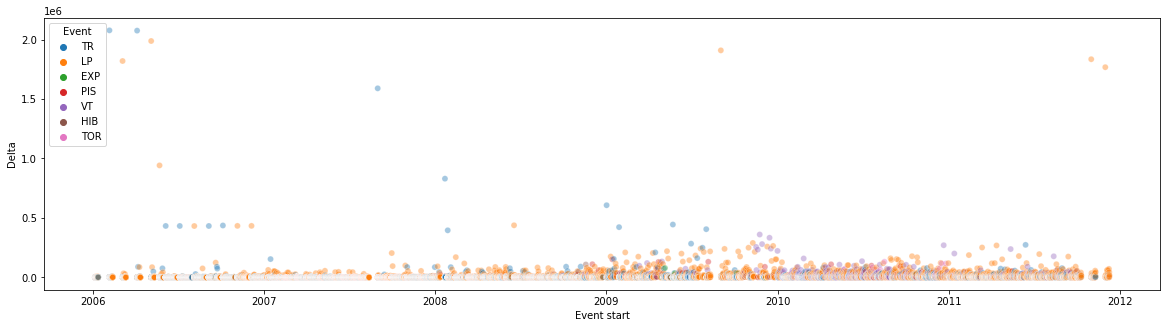

In [125]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,5))
sns.scatterplot(x="Event start", y='Delta',hue='Event', data=df, alpha=0.4, ax=ax)